In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("./data/bmi.csv" , index_col = "label")
data.head(2)

,height,weight
label,,
normal,140,45
fat,145,72


In [7]:
data.shape

(20000, 2)

In [8]:
data.index.unique() #uniqe 하면 중복제거된 인덱스 확인가능

Index(['normal', 'fat', 'thin'], dtype='object', name='label')

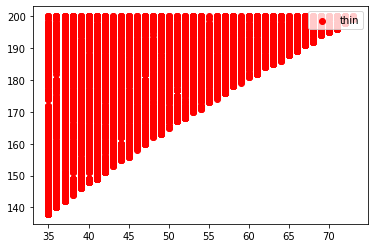

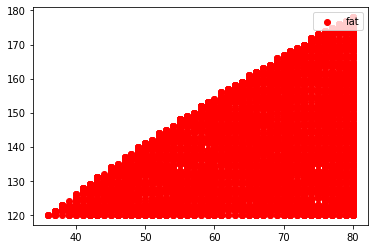

In [19]:
weight =data.loc["thin","weight"]
height = data.loc["thin","height"]
plt.scatter(weight,height, c='red', label = "thin") #산점도
plt.legend(loc=1) #범례 legend , 범례위치 loc 조정
plt.figure() # 한공간안에 표 두개 보여줌
weight =data.loc["fat","weight"]
height = data.loc["fat","height"]
plt.scatter(weight,height, c='red', label = "fat") #산점도
plt.legend(loc=1) #범례 legend , 범례위치 loc 조정


In [20]:
def scatter(lbl,color) :  #함수로 생성
    weight =data.loc[lbl,"weight"]
    height = data.loc[lbl,"height"]
    plt.scatter(weight,height, c=color, label = lbl) #산점도

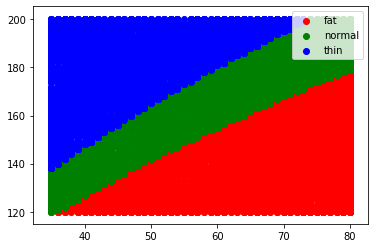

In [21]:
scatter("fat","red")
scatter("normal","green")
scatter("thin","blue")
plt.legend(loc=1) #범례 legend , 범례위치 loc 조정

In [22]:
data = pd.read_csv("./data/bmi.csv")
data.head(4)

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat


### train, test데이터를 7:3으로 자르세요

In [36]:
train = data.iloc[:14000]
train

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin
...,...,...,...
13995,167,56,normal
13996,142,45,normal
13997,160,44,thin
13998,158,80,fat


In [37]:
test = data.iloc[14000:]
test

,height,weight,label
14000,178,73,normal
14001,185,56,thin
14002,176,76,normal
14003,188,38,thin
14004,162,75,fat
...,...,...,...
19995,157,67,fat
19996,138,40,normal
19997,163,62,normal
19998,169,68,normal


X_train, y_train, X_test, y_test

In [38]:
X_train = train.iloc[:,:2]
y_train = train.iloc[:,2]
X_test = test.iloc[:,:2]
y_test = test.iloc[:,2]

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14000, 2), (14000,), (6000, 2), (6000,))

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test) #정확도

0.9946666666666667

In [46]:
model.predict([[179,80]])

array(['normal'], dtype=object)